In [1]:
!pip install --user uproot
!pip install --user tqdm
!pip install awkward
!pip install xgboost
!pip install sklearn
!pip install seaborn

In [1]:
!python --version

Python 3.9.7


In [2]:
import uproot
import glob
import pandas as pd
from tqdm import tqdm
import numpy as np
import awkward as ak
import ROOT

Welcome to JupyROOT 6.24/02


In [3]:
root_files = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/train/optimal*.root")

In [4]:
root_files[0]

'/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/train/optimal_emua_fakeL17.root'

In [5]:
f1 = uproot.open(root_files[0])
tree=f1['outtree']

In [6]:
branch=tree.keys()
unneccesary_columns = ['LHEScaleWeight','LHEPdfWeight']
for c in unneccesary_columns:
    branch.remove(c)
len(branch)

115

In [7]:
f = uproot.lazy(root_files[0]+':outtree')

In [8]:
f

<Array [{channel: 1, ... HLT_emu: 9.81e+05}] type='280 * {"channel": int32, "ptV...'>

In [9]:
f = uproot.lazy(root_files[0]+':outtree')
events = ak.to_pandas(f[branch])
len(f)

280

In [10]:
def get_df(root_file_name):
    
    f = uproot.lazy(root_file_name+":outtree")
    if len(f) == 0:
        return pd.DataFrame()
    df = ak.to_pandas(f[branch])

    return df  

In [11]:
df = pd.concat((get_df(f) for f in tqdm(root_files)), ignore_index=True)

100%|███████████████████████████████████████████| 36/36 [00:12<00:00,  2.88it/s]


In [12]:
df.shape

(18461, 115)

In [13]:
df

,channel,ptVlep,phiVlep,yVlep,lep1_pid,lep2_pid,lep1pt,lep2pt,lep1eta,lep2eta,...,muon_iso_scale_Down,photon_id_scale,photon_id_scale_Up,photon_id_scale_Down,photon_veto_scale,photon_veto_scale_Up,photon_veto_scale_Down,HLT_ee,HLT_mm,HLT_emu
0,1,54.453506,0.356105,-0.093506,13,-11,21.243734,33.708263,0.463379,-0.439575,...,0.991103,0.988402,0.997400,0.979405,0.903129,0.910653,0.895604,6.238057e+26,7.303967e+28,9.806721e+05
1,1,50.346642,2.923757,-1.499664,13,-11,24.989485,29.258297,-1.179443,-1.611328,...,1.000835,1.032532,1.042235,1.022828,0.903129,0.910653,0.895604,6.238057e+26,7.303967e+28,9.806721e+05
2,1,165.415863,-2.242637,-1.099082,-13,11,34.283157,194.023453,-1.480713,-0.708374,...,1.005987,0.970037,0.976563,0.963512,0.969959,0.972307,0.967611,6.238246e+26,7.303968e+28,9.806721e+05
3,1,107.673973,2.943537,0.282655,-13,11,61.859890,57.235390,-0.513794,0.963013,...,0.998357,1.017199,1.034910,0.999488,0.969959,0.972307,0.967611,6.238246e+26,7.303968e+28,9.806721e+05
4,1,46.935432,0.857526,-2.760113,-13,11,88.806442,46.639313,-2.028320,-0.738525,...,0.999918,1.034358,1.057044,1.011672,0.903129,0.910653,0.895604,6.238246e+26,7.303968e+28,9.806721e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18456,1,44.024933,0.597358,-1.494792,13,-11,25.208357,28.360579,-0.735107,-1.673828,...,0.976534,1.000000,1.015759,0.984241,0.980359,0.982144,0.978575,9.219423e-41,3.601337e-43,1.401298e-45
18457,1,127.641548,0.954342,0.337385,13,-11,82.370987,48.810989,0.728882,-0.429443,...,0.998323,0.983122,1.010760,0.955485,0.980359,0.982144,0.978575,9.219423e-41,3.601337e-43,1.401298e-45
18458,1,90.577461,0.936975,0.924840,-13,11,25.338013,73.133980,-0.017792,1.091797,...,0.976534,0.987835,1.001200,0.974469,0.980359,0.982144,0.978575,9.219563e-41,3.601337e-43,1.401298e-45
18459,1,50.444962,-0.911866,0.069489,-13,11,21.614164,34.297829,0.779663,-0.427246,...,0.977342,0.983122,1.010760,0.955485,0.980359,0.982144,0.978575,9.183690e-41,3.587324e-43,1.401298e-45


In [14]:
features=['drll','mT','mT2','mll','yVlep','phiVlep','drl1a','drl2a','njets20']
#features=['lep1pt','lep2pt','lep1eta','lep2eta','lep1phi','lep2phi','drll','ptll','yVlep','phiVlep','mll','mT','mT2','PuppiMET_T1Smear_pt','PuppiMET_T1Smear_phi','photonet','photoneta','drl1a','drl2a','n_bjets20_medium']

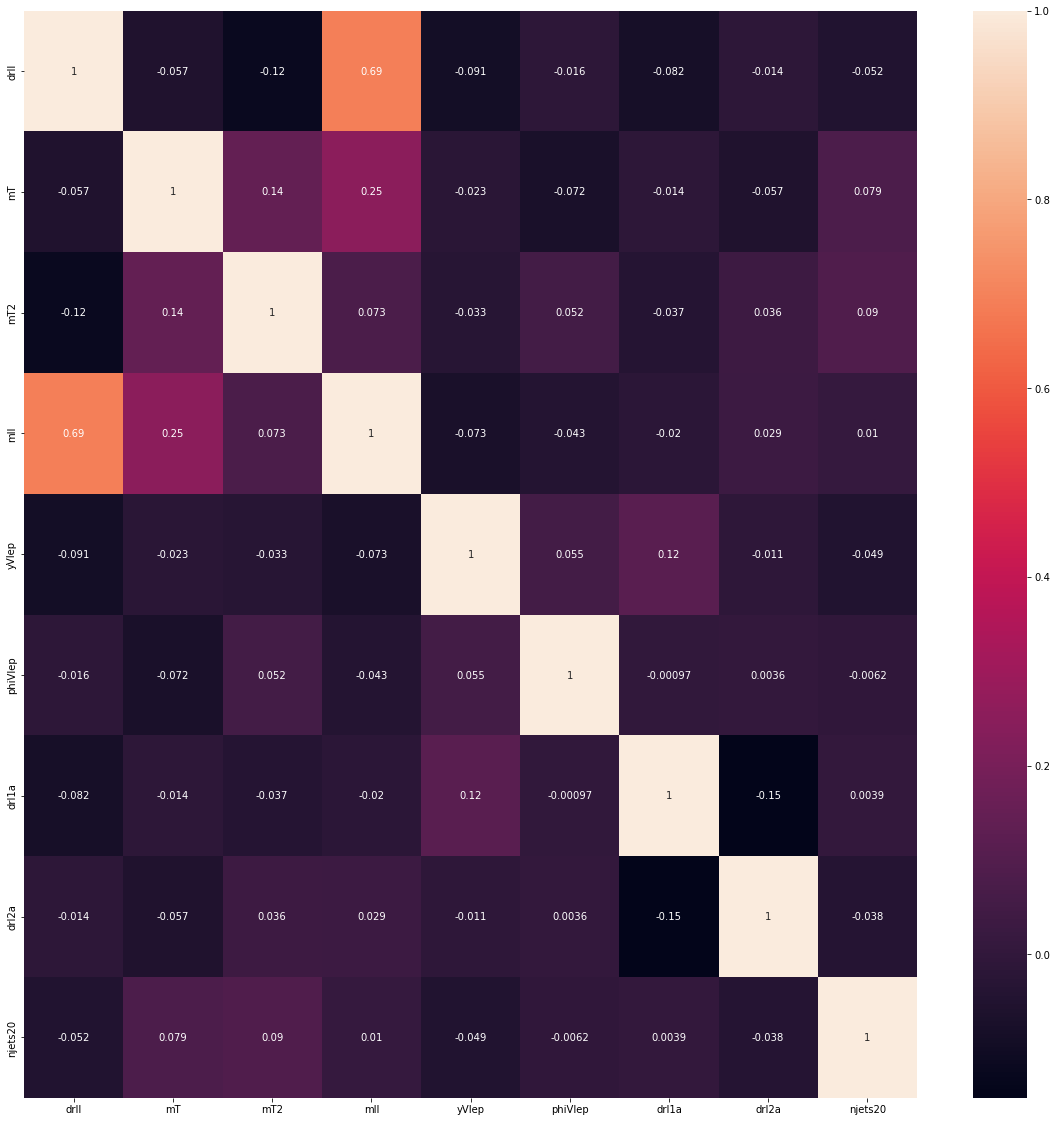

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
corr = df[features].corr()
sns.heatmap(corr, annot = True)
#sns.heatmap(corr)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
n_boost_rounds = 10
xgboost_params = {'eval_metric':'logloss',
#                  'max_depth' : 8,
#                  'eta':0.3,
                  'objective'  :'binary:logistic'}

In [19]:
category=['0jets','1jets']

In [20]:
#for i,group_df in df.groupby("njets30"):
#    print(i,'',group_df['njets30'])
df.loc[df.query('actualWeight<0').index,'actualWeight']=0
X=df[features]
Y=df['isSignal']
    
    #random_state is the seed used by the random number generator, 
    #random_state=42 make others get the same data spliting in different executions.
    # shuffle make the bkg and signal mix randomly.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, 
                                                    random_state=42,shuffle=True)
idx_train = X_train.index
idx_test = X_test.index
    
    # XGBoost has it's own data format, so we have to create these structures. 
    #(The copies have no specific purpose other than silencing an xgboost warning.)

dmatrix_train = xgb.DMatrix(X_train.copy(), label=np.copy(y_train),weight=df.loc[idx_train,'actualWeight'])
dmatrix_test  = xgb.DMatrix(X_test.copy(), label=np.copy(y_test ),weight=df.loc[idx_test,'actualWeight'])
    
n_pos = np.sum(df.loc[df.loc[idx_train].query('isSignal==1').index,'actualWeight'])
n_neg = np.sum(df.loc[df.loc[idx_train].query('isSignal==0').index,'actualWeight'])
    
    
#dmatrix_train = xgb.DMatrix(X_train.copy(), label=np.copy(y_train))
#dmatrix_test  = xgb.DMatrix(X_test.copy(), label=np.copy(y_test ))

#n_pos = np.sum(y_train == 1)
#n_neg = np.sum(y_train == 0)

print('number of bkg ',n_neg,' number of sig ',n_pos)
    # There is one additional hyperparameter needed to set per catoegy: `scale_pos_weight`.
    # It corresponds  to a weight given to every positive sample, and it usually set to
    # n_neg / n_pos when you have imbalanced datasets to balance the total contributions
    # of the positive and negative classes in the loss function
    
xgboost_params["scale_pos_weight"] = 1. * n_neg / n_pos
    
    # Train
model = xgb.train(xgboost_params,
                      dmatrix_train,
                      num_boost_round=n_boost_rounds,
                      evals= [(dmatrix_train, 'train'),
                              (dmatrix_test, 'test')],
                      early_stopping_rounds=10,
                      verbose_eval=False)
    
best_iteration = model.best_iteration + 1
if best_iteration < n_boost_rounds:
        print("early stopping after {0} boosting rounds".format(best_iteration))
print("")
    
model.save_model('model.json')
 
    # Add new column for the BDT output
df.loc[idx_train, "score"] = model.predict(dmatrix_train)
df.loc[idx_test, "score"] = model.predict(dmatrix_test)
    
    # Add new column to separate the test and train
df.loc[idx_train, "test"] = False
df.loc[idx_test, "test"] = True

number of bkg  222.86453  number of sig  2.5797315
early stopping after 9 boosting rounds



In [47]:
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_roc_curve(df, score_column, tpr_threshold=0.7, ax=None, color=None, linestyle='-', label=None):
    if ax is None:
        ax = plt.gca()
    if label is None:
        label = score_column
    fpr, tpr, thresholds = metrics.roc_curve(df['isSignal'], df[score_column])
    mask = tpr > tpr_threshold
    fpr, tpr = fpr[mask], tpr[mask]
    ax.semilogy(tpr, fpr, label=label, color=color, linestyle=linestyle)

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(df['isSignal'], df['score'])

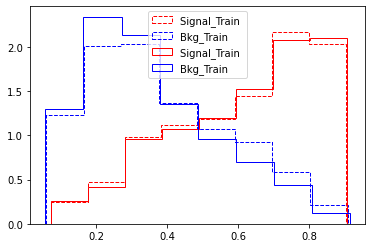

In [27]:
df_WWg_test = df.query('test==True & isSignal==1')
df_bkg_test = df.query('test==True & isSignal!=1')
df_WWg_train = df.query('test!=True & isSignal==1')
df_bkg_train = df.query('test!=True & isSignal!=1')
#Bins = np.linspace(0.2,1,20+1)
Bins = 8
plt.figure()
# test
plt.hist(df_WWg_test['score'],bins=Bins,histtype="step",label="Signal_Train ",density = True,color='red',linestyle='dashed')
plt.hist(df_bkg_test['score'],bins=Bins,histtype="step",label="Bkg_Train ",density = True,color='blue',linestyle='dashed')
# train
plt.hist(df_WWg_train['score'],bins=Bins,histtype="step",label="Signal_Train ",density = True,color='red')
plt.hist(df_bkg_train['score'],bins=Bins,histtype="step",label="Bkg_Train ",density = True,color='blue')
plt.legend(loc=9)

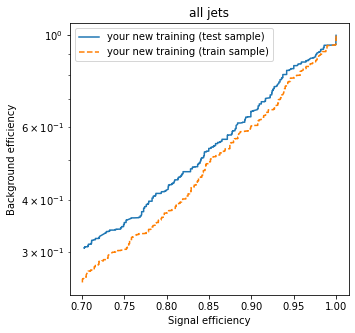

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
if True:
    
    df_train = df.query('test==False')
    df_test =  df.query("test==True")
    
    ax=axes
    ax.set_xlabel("Signal efficiency")
    ax.set_ylabel("Background efficiency")
    #plot_roc_curve(df_test, "lep1pt", ax=ax)
    plot_roc_curve(df_test, "score", ax=ax, label="your new training (test sample)")
    plot_roc_curve(df_train, "score", ax=ax, color="#ff7f02", linestyle='--', label="your new training (train sample)")
    ax.set_title('all jets')
    ax.legend()

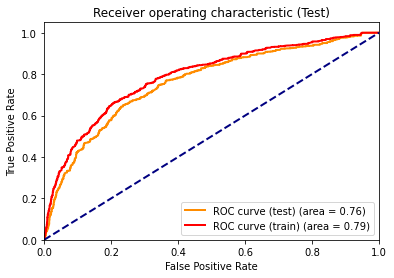

In [28]:
from sklearn.metrics import roc_curve, auc
if True:
    
    df_train = df.query('test==False')
    df_test =  df.query("test==True")

    
    fpr, tpr, _ = roc_curve(df_test['isSignal'], df_test['score'])
    fpr1, tpr1, _1 = roc_curve(df_train['isSignal'], df_train['score'])
    
    roc_auc = auc(fpr, tpr)
    roc_auc1 = auc(fpr1, tpr1)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc)
    plt.plot(fpr1, tpr1, color='red',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc1)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (Test)')
    plt.legend(loc="lower right")

In [28]:
model=xgb.Booster()
model.load_model('./model.json')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

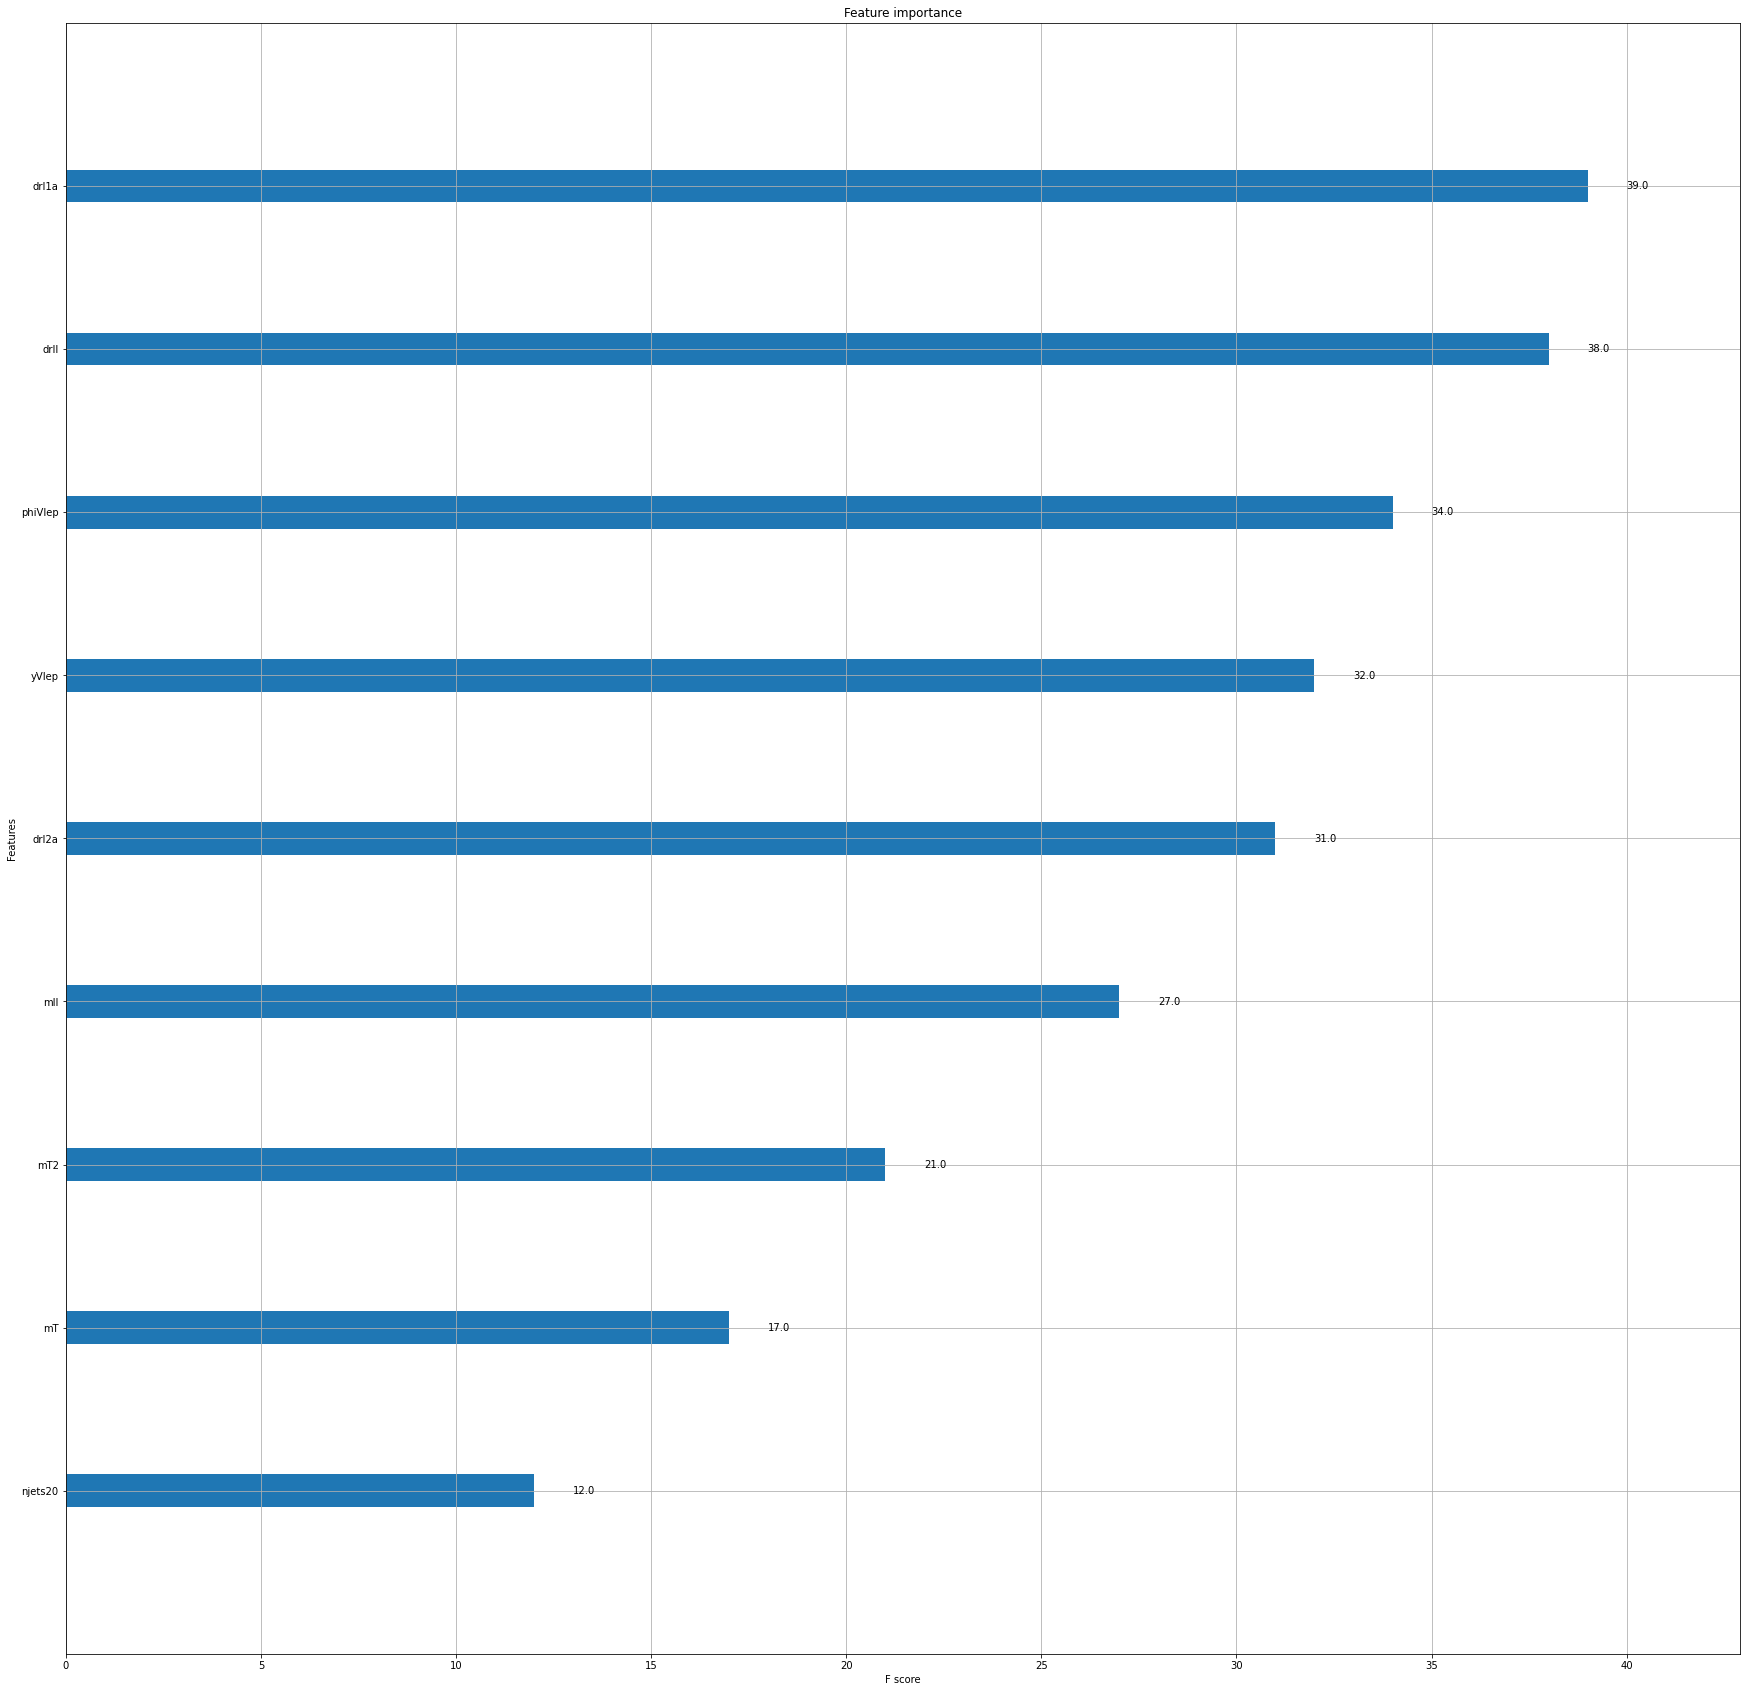

In [29]:
from xgboost import plot_importance
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

plot_importance(model,ax=ax)

In [32]:
root_files18 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal*18.root")
root_files17 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal*17.root")

In [33]:
def get_df_year(root_files,features,lumi):
#   df = pd.concat((get_df(f) for f in tqdm(root_files)), ignore_index=True)
    ls=[]
    for f in root_files:
#        print(f)
        df_tmp = get_df(f)
        if 'plj' not in f and 'fake' not in f:
            print(f)
            df_tmp['actualWeight']=df_tmp['actualWeight']*lumi
        ls.append(df_tmp)
    df=pd.concat(ls,ignore_index=True)
    model=xgb.Booster()
    model.load_model('./model.json')
    dmatrix = xgb.DMatrix(df[features], label=np.copy(df['isSignal']))
    df.loc[df.index, "score"] = model.predict(dmatrix)
    return df

In [34]:
df18=get_df_year(root_files18,features,59.7)

/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ST18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_TTGJets18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_VV18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WGJets18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WWG_emu18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ZGJets18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_tZq18.root


In [35]:
def get_hist(df):
    hist=ROOT.TH1D("h1","",10,0.,1)
    for i in range(0,df.shape[0]):
        hist.Fill(df['score'].iloc[i],df['actualWeight'].iloc[i])
    return hist    

In [36]:
bkg18=df18.query('isSignal!=1 ')
sig18=df18.query('isSignal==1 ')

In [37]:
hist_sig=get_hist(sig18)
hist_bkg=get_hist(bkg18)

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [38]:
c1=ROOT.TCanvas("c1","",900,600)

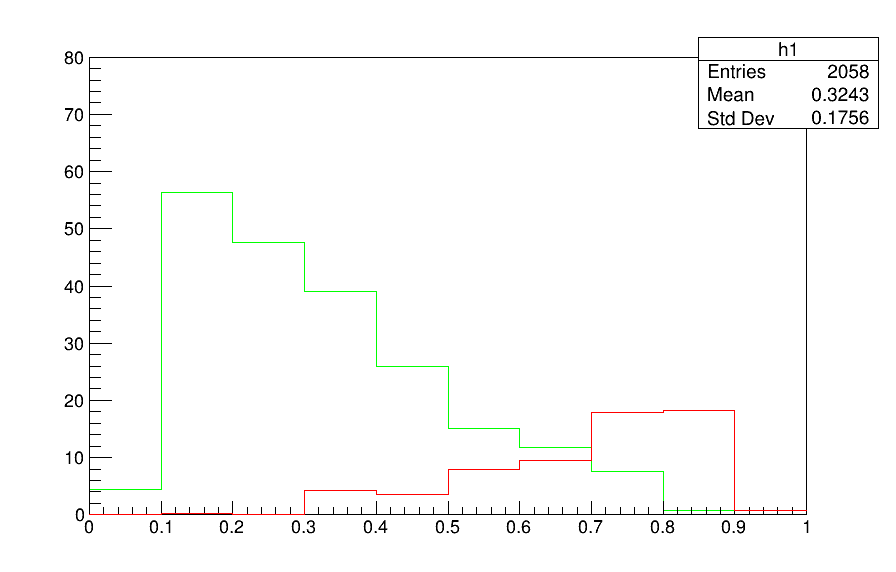

In [39]:
hist_bkg.SetLineColor(3)
hist_bkg.Draw("hist")
hist_bkg.GetYaxis().SetRangeUser(0,80)
#gStyle.SetOptStat(0)
hist_sig.SetLineColor(2)
hist_sig.Draw('hist same')
c1.Draw()
c1.Update()

In [40]:
data_files18 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal*18.root")

In [41]:
data_files18

['/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Muon18.root',
 '/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_MuonEG18.root',
 '/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Ele18.root']

In [42]:
data18=get_df_year(data_files18,features,1)

/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Muon18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_MuonEG18.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Ele18.root


(array([ 4.46694279, 56.50801468, 47.04114914, 43.1975174 , 29.52804565,
        22.9896698 , 21.23982239, 25.56213379, 18.99728394,  0.6656189 ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x7f5fdef86040>])

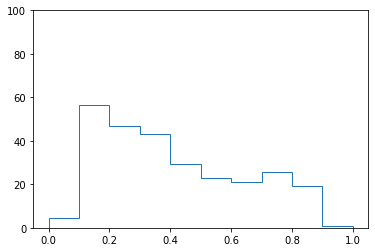

In [44]:
Bins = np.linspace(0.,1,10+1)
plt.figure()
plt.ylim(0.,100)
plt.hist(df18['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=df18['actualWeight'])
#plt.hist(data18['score'],bins=Bins,histtype="step",label="Signal_Test",
#         density = False,weights=data18['actualWeight'])

(array([ 0.        ,  0.1584803 , -0.54640597,  4.23905659,  3.6093359 ,
         7.87777758,  9.48694324, 17.96069717, 18.25099564,  0.81334686]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [<matplotlib.patches.Polygon at 0x7f5fded6a640>])

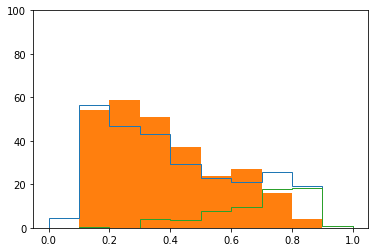

In [45]:
Bins = np.linspace(0.,1,10+1)
#Bins = 10
plt.figure()
plt.ylim(0.,100)
plt.hist(df18['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df18['actualWeight'])
plt.hist(data18['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data18['actualWeight'])
plt.hist(sig18['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig18['actualWeight'])

In [54]:
import numpy as np
def get_bin(cumu,bins):
    a=np.where(cumu[0]>0.2)
    a[0][0] 
    x=[0]
    y=[0]
    nbin=2

    for i in bins:
        a=np.where(cumu[0]>i)
        ibin=a[0][0]
        ytmp=cumu[0][ibin]
        xtmp=cumu[1][ibin]
        y.append(ytmp)
        x.append(xtmp)
        print(ytmp,xtmp)
    x.append(1)
    y.append(1)
    return x

0.2073360821976775 0.5576
0.4057831940964831 0.672
0.6113849279697882 0.7432
0.8068382493819769 0.8096


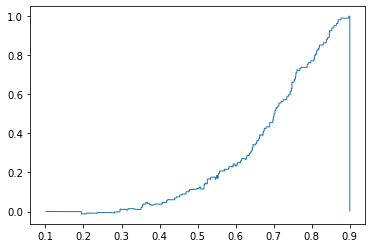

In [55]:
Bins = np.linspace(0.1,0.9,1000+1)
#plt.figure()
cumu18=plt.hist(sig18['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = True,weights=sig18['actualWeight'],cumulative=True)
bins18=[0.20,0.4,0.6,0.8]
#bins=[0.15,0.3,0.45,0.6,0.75,0.9]
Bins = get_bin(cumu18,bins18)

(array([11.85331631, 11.82836819, 12.53811073, 12.18972778, 13.44083023]),
 array([0.    , 0.5576, 0.672 , 0.7432, 0.8096, 1.    ]),
 [<matplotlib.patches.Polygon at 0x7f3f543bf370>])

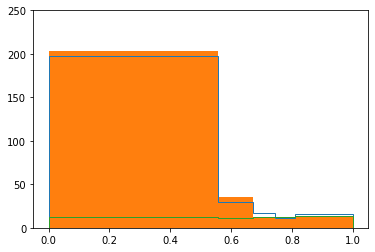

In [59]:
plt.ylim(0.,250)
plt.hist(df18['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df18['actualWeight'])
plt.hist(data18['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data18['actualWeight'])
plt.hist(sig18['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig18['actualWeight'])

In [60]:
sig18['actualWeight'].sum()

61.850464

In [61]:
df18['actualWeight'].sum()

270.1999

In [62]:
data_files17 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal*17.root")
df17=get_df_year(root_files17,features,41.52)
data17=get_df_year(data_files17,features,1)
bkg17=df17.query('isSignal!=1 ')
sig17=df17.query('isSignal==1 ')

/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ST17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_TTGJets17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_VV17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WGJets17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WWG_emu17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ZGJets17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_tZq17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Muon17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_MuonEG17.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Ele17.root


(array([-0.06296685, -0.49943116, -0.81342047,  0.28907716,  1.75826442,
         1.19022858,  7.86133957,  9.14248848,  8.28444672,  6.72402382]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ]),
 [<matplotlib.patches.Polygon at 0x7f3ee5a08970>])

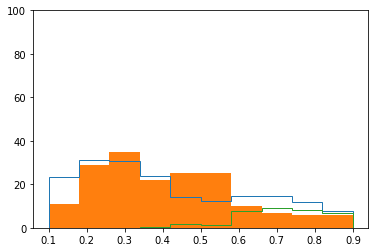

In [63]:
Bins = np.linspace(0.1,0.9,10+1)
#Bins = 10
plt.figure()
plt.ylim(0.,100)
plt.hist(df17['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df17['actualWeight'])
plt.hist(data17['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data17['actualWeight'])
plt.hist(sig17['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig17['actualWeight'])

0.20781894823767447 0.628
0.4054806646867387 0.6992
0.6023333751797533 0.7464000000000001
0.8014992647149597 0.8192


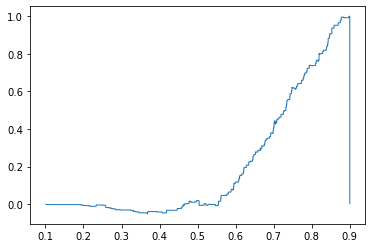

In [64]:
Bins = np.linspace(0.1,0.9,1000+1)
#plt.figure()
cumu17=plt.hist(sig17['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = True,weights=sig17['actualWeight'],cumulative=True)
bins17=[0.20,0.4,0.6,0.8]
#bins=[0.15,0.3,0.45,0.6,0.75,0.9]
Bins17 = get_bin(cumu17,bins17)

(array([6.62852621, 6.70748568, 6.60646057, 6.08939362, 9.01540565]),
 array([0.    , 0.628 , 0.6992, 0.7464, 0.8192, 1.    ]),
 [<matplotlib.patches.Polygon at 0x7f3f5448e9d0>])

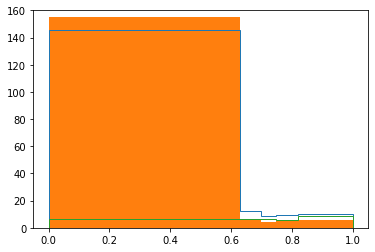

In [65]:
plt.ylim(0.,160)
plt.hist(df17['score'],bins=Bins17,histtype="step",label="Signal_Test",
          density = False,weights=df17['actualWeight'])
plt.hist(data17['score'],bins=Bins17,histtype="bar",label="Signal_Test",
         density = False,weights=data17['actualWeight'])
plt.hist(sig17['score'],bins=Bins17,histtype="step",label="Signal_Test",
         density = False,weights=sig17['actualWeight'])

In [66]:
data_files_pre16 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal*_pre16.root")
root_files_pre16 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal*_pre16.root")
df_pre16=get_df_year(root_files_pre16,features,19.5)
data_pre16=get_df_year(data_files_pre16,features,1)
bkg_pre16=df_pre16.query('isSignal!=1 ')
sig_pre16=df_pre16.query('isSignal==1 ')

/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ST_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_TTGJets_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_tZq_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_VV_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WGJets_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_WWG_emu_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/optimal_emua_ZGJets_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Ele_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_MuonEG_pre16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/optimal_emua_Muon_pre16.root


In [67]:
data_files_post16 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/post16/optimal*16.root")
root_files_post16 = glob.glob("/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal*16.root")
df_post16=get_df_year(root_files_post16,features,16.81)
data_post16=get_df_year(data_files_post16,features,1)
bkg_post16=df_post16.query('isSignal!=1 ')
sig_post16=df_post16.query('isSignal==1 ')

/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_ST16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_TTGJets16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_tZq16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_VV16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_WGJets16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_WWG_emu16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/post16/optimal_emua_ZGJets16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/post16/optimal_emua_Ele16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/post16/optimal_emua_Muon16.root
/home/pku/anying/cms/PKU-Cluster/WWg/BDT/rootfiles/data/post16/optimal_emua_MuonEG16.root


In [68]:
print(sig_post16['actualWeight'].sum())
print(sig_pre16['actualWeight'].sum())

15.989008
17.57906


In [69]:
data16=pd.concat([data_pre16,data_post16])
df16=pd.concat([df_pre16,df_post16])
sig16=df16.query('isSignal==1')
bkg16=df16.query('isSignal!=1')

(array([-0.0757992 , -0.19684371, -0.08309823,  0.55843753,  1.06341434,
         1.65423369,  3.5251193 ,  6.53614569,  9.44092751,  9.69096947]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ]),
 [<matplotlib.patches.Polygon at 0x7f3f548d62e0>])

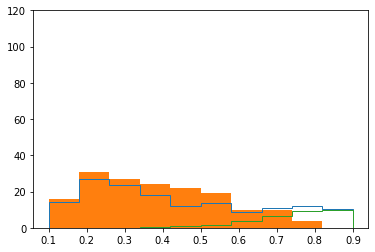

In [70]:
Bins = np.linspace(0.1,0.9,10+1)
#Bins = 10
plt.figure()
plt.ylim(0.,120)
plt.hist(df16['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df16['actualWeight'])
plt.hist(data16['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data16['actualWeight'])
plt.hist(sig16['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig16['actualWeight'])

In [71]:
sig16['actualWeight'].sum()

33.568066

0.2007088107534331 0.6584
0.40424141857754314 0.7368
0.6136283860912985 0.8056
0.8040113025799317 0.8504


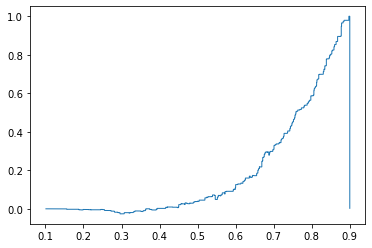

In [72]:
Bins = np.linspace(0.1,0.9,1000+1)
#plt.figure()
cumu16=plt.hist(sig16['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = True,weights=sig16['actualWeight'],cumulative=True)
bins16=[0.20,0.4,0.6,0.8]
#bins=[0.15,0.3,0.45,0.6,0.75,0.9]
Bins16 = get_bin(cumu16,bins16)

(array([5.9647541 , 6.74678421, 6.24155998, 6.7165947 , 7.89831543]),
 array([0.    , 0.6584, 0.7368, 0.8056, 0.8504, 1.    ]),
 [<matplotlib.patches.Polygon at 0x7f3ee568d760>])

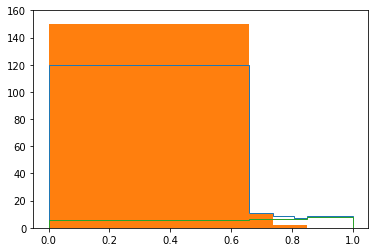

In [73]:
plt.ylim(0.,160)
plt.hist(df16['score'],bins=Bins16,histtype="step",label="Signal_Test",
          density = False,weights=df16['actualWeight'])
plt.hist(data16['score'],bins=Bins16,histtype="bar",label="Signal_Test",
         density = False,weights=data16['actualWeight'])
plt.hist(sig16['score'],bins=Bins16,histtype="step",label="Signal_Test",
         density = False,weights=sig16['actualWeight'])

In [74]:
data=pd.concat([data18,data17,data16])

In [75]:
df_tot=pd.concat([df18,df17,df16])

In [76]:
sig=df_tot.query('isSignal==1')
bkg=df_tot.query('isSignal!=1')

0.2007227828390554 0.5702
0.4004865405284865 0.6524000000000001
0.6162571826844756 0.7010000000000001
0.8026105975164782 0.7466000000000002


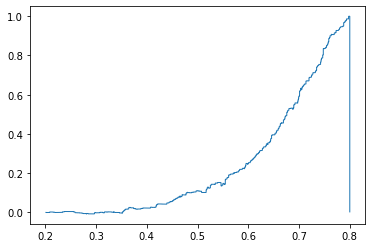

In [77]:
Bins = np.linspace(0.2,0.8,1000+1)
#plt.figure()
cumu=plt.hist(sig['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = True,weights=sig['actualWeight'],cumulative=True)
bins=[0.20,0.4,0.6,0.8]
#bins=[0.15,0.3,0.45,0.6,0.75,0.9]
Bins = get_bin(cumu,bins)

(array([16.89177132, 18.30303383, 18.34450912, 17.51646423, 59.40938568]),
 array([0.    , 0.5702, 0.6524, 0.701 , 0.7466, 1.    ]),
 [<matplotlib.patches.Polygon at 0x7f3ee55b6a00>])

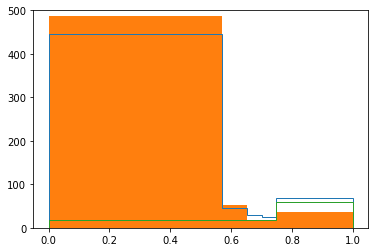

In [78]:
plt.ylim(0.,500)
plt.hist(df_tot['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df_tot['actualWeight'])
plt.hist(data['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data['actualWeight'])
plt.hist(sig['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig['actualWeight'])

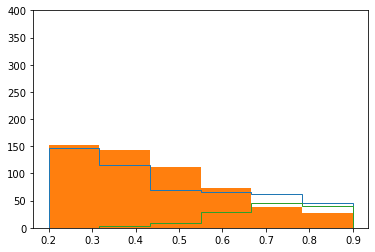

In [79]:
Bins = np.linspace(0.2,0.9,6+1)
#Bins = 10
plt.figure()
plt.ylim(0.,400)
plt.hist(df_tot['score'],bins=Bins,histtype="step",label="Signal_Test",
          density = False,weights=df_tot['actualWeight'])
plt.hist(data['score'],bins=Bins,histtype="bar",label="Signal_Test",
         density = False,weights=data['actualWeight'])
h=plt.hist(sig['score'],bins=Bins,histtype="step",label="Signal_Test",
         density = False,weights=sig['actualWeight'])

In [80]:
sig['actualWeight'].sum()

130.4654

In [81]:
print(sig16['actualWeight'].sum(),sig17['actualWeight'].sum(),sig18['actualWeight'].sum())

33.568066 35.04686 61.850464


In [82]:
33.568066 +35.04686 +61.850464

130.46539

In [83]:
df_tot['actualWeight'].sum()

611.5423

In [84]:
import math
130/math.sqrt(611-130)

5.927489783638191

In [85]:
def get_hist_year(root_files,features,year,lumi):

    df = get_df(root_files)
    if 'plj' not in f and 'fake' not in f:
        print(f)
        df['actualWeight']=df['actualWeight']*lumi
    model=xgb.Booster()
    model.load_model('./model.json')
    dmatrix = xgb.DMatrix(df[features], label=np.copy(df['isSignal']))
    df.loc[df.index, "score"] = model.predict(dmatrix)
    
    f1=ROOT.TFile('hist_'+root_files+year+'.root','recreate')
    
    cumu=plt.hist(sig['score'],bins=Bins,histtype="step",label="Signal",
         density = True,weights=sig['actualWeight'],cumulative=True)    
    bins=[0.20,0.4,0.6,0.8]
    Bins = np.array(get_bin(cumu,bins))
    h1=ROOT.TH1D('h1','',5,np.array(Bins))
    for i in range(0,df.shape[0]):
        h1.Fill(df['score'].iloc[0],df['actualWeight'].iloc[0])
    f1.cd()
    h1.Write()
    f1.Close()
    return f1

In [86]:
df_tot['score'].iloc[0]

0.3599611

In [ ]:
f=get_hist_year('',)